<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/Bias_and_Variance_L1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully!
Number of samples: 20640
Number of features: 8
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Training set size: 12384
Cross-validation set size: 4128
Test set size: 4128
Feature used: MedInc
Degree 1:
  J_train: 0.6962
  J_cv: 0.7145
  Ratio (J_cv / J_train): 1.03
Degree 2:
  J_train: 0.6907
  J_cv: 0.7111
  Ratio (J_cv / J_train): 1.03
Degree 3:
  J_train: 0.6775
  J_cv: 0.7021
  Ratio (J_cv / J_train): 1.04
Degree 4:
  J_train: 0.6774
  J_cv: 0.7018
  Ratio (J_cv / J_train): 1.04
Degree 5:
  J_train: 0.6773
  J_cv: 0.7019
  Ratio (J_cv / J_train): 1.04
Degree 6:
  J_train: 0.6757
  J_cv: 0.6993
  Ratio (J_cv / J_train): 1.03
Degree 7:
  J_train: 0.6724
  J_cv: 0.6974
  Ratio (J_cv / J_train): 1.04
Degree 8:
  J_train: 0.6722
  J_cv: 0.6973
  Ratio (J_cv / J_train): 1.04
Degree 9:
  J_train: 0.6725
  J_cv: 0.6981
  Ratio (J_cv / J_train): 1.04
Degree 10:
  J_train: 0.6743
  J_cv: 0.6997
  Ratio

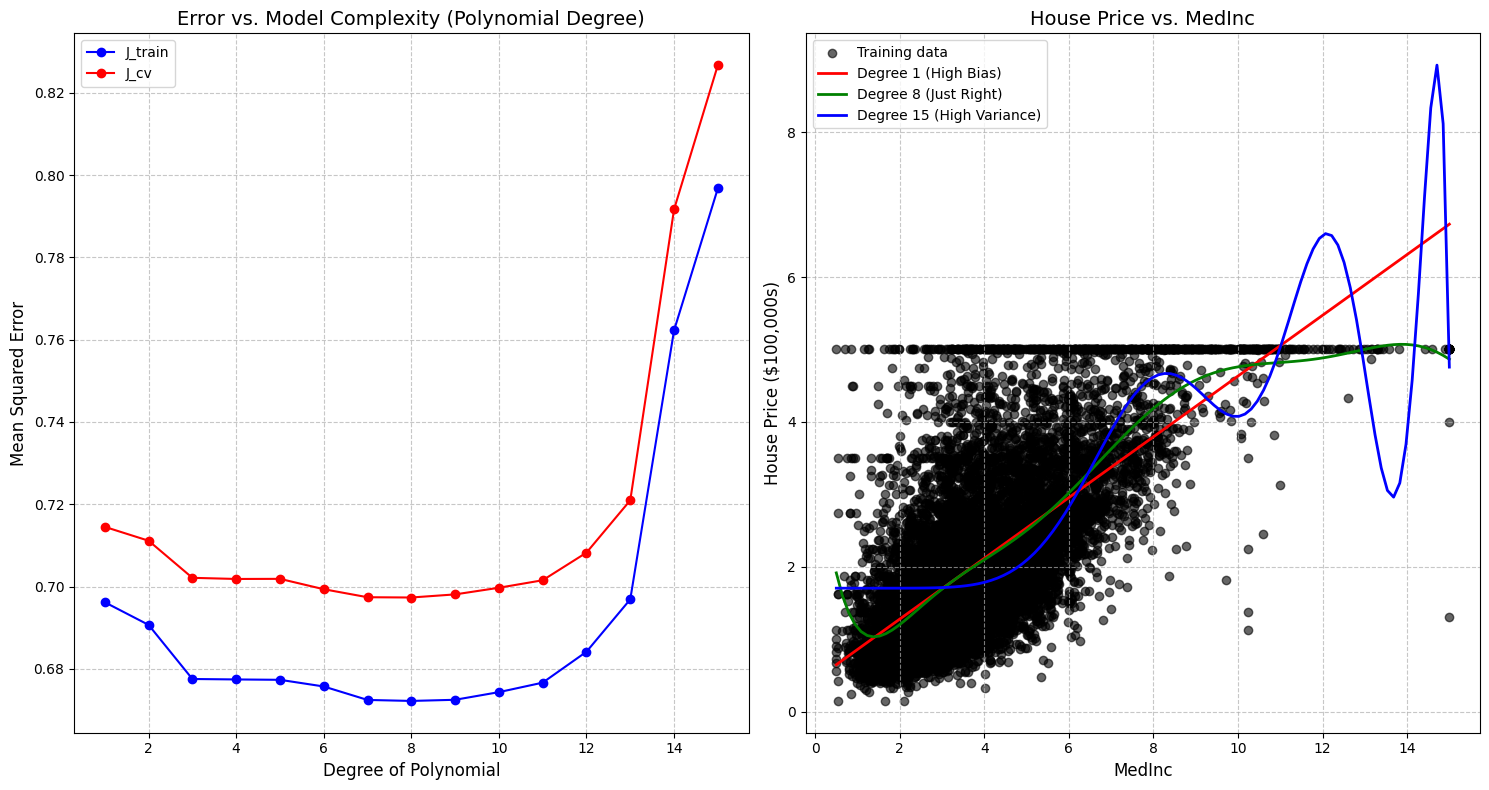

'\n# Change this to experiment with different features\n# Feature indices and names:\n# 0: MedInc (median income)\n# 1: HouseAge (median house age)\n# 2: AveRooms (average rooms)\n# 3: AveBedrms (average bedrooms)\n# 4: Population (population)\n# 5: AveOccup (average occupancy)\n# 6: Latitude\n# 7: Longitude\n\ncustom_feature_idx = 1  # Try different values (0-7)\ncustom_X_single = X[:, custom_feature_idx].reshape(-1, 1)\ncustom_feature_name = feature_names[custom_feature_idx]\n\n# Split the data again with the new feature\nX_train_custom, X_temp_custom, y_train, y_temp = train_test_split(\n    custom_X_single, y, test_size=0.4, random_state=42\n)\nX_cv_custom, X_test_custom, y_cv, y_test = train_test_split(\n    X_temp_custom, y_temp, test_size=0.5, random_state=42\n)\n\n# Create and evaluate models for the new feature\ncustom_degrees = [1, 2, 3, 5, 10]  # Try different polynomial degrees\ncustom_train_errors = []\ncustom_cv_errors = []\ncustom_models = []\n\nfor degree in custom_degr

In [3]:
# Updated Real-World Example: Bias and Variance in California Housing Dataset
# This example uses California housing data to demonstrate bias and variance concepts

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset (a modern alternative to Boston dataset)
california = fetch_california_housing()
X = california.data  # Features
y = california.target  # Target (house prices in $100,000s)
feature_names = california.feature_names

print("Dataset loaded successfully!")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Features: {feature_names}")

# For simplicity, let's focus on just one feature
feature_idx = 0  # MedInc (median income) - You can change this to experiment with different features
X_single = X[:, feature_idx].reshape(-1, 1)
feature_name = feature_names[feature_idx]

# Split the data into training, cross-validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_single, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Cross-validation set size: {X_cv.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Feature used: {feature_name}")

# Function to evaluate a model's performance
def evaluate_model(model, degree, X_train, y_train, X_cv, y_cv):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on both training and CV sets
    y_train_pred = model.predict(X_train)
    y_cv_pred = model.predict(X_cv)

    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    cv_error = mean_squared_error(y_cv, y_cv_pred)

    return train_error, cv_error, model

# Create and evaluate models of different complexities
max_degree = 15
degrees = list(range(1, max_degree + 1))
train_errors = []
cv_errors = []
models = []

for degree in degrees:
    # Create a pipeline with polynomial features and linear regression
    model = make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression()
    )

    # Evaluate the model
    train_error, cv_error, fitted_model = evaluate_model(
        model, degree, X_train, y_train, X_cv, y_cv
    )

    train_errors.append(train_error)
    cv_errors.append(cv_error)
    models.append(fitted_model)

    print(f"Degree {degree}:")
    print(f"  J_train: {train_error:.4f}")
    print(f"  J_cv: {cv_error:.4f}")
    print(f"  Ratio (J_cv / J_train): {cv_error / train_error:.2f}")

# Plot the results
plt.figure(figsize=(15, 8))

# Plot 1: Error vs. Model Complexity
plt.subplot(1, 2, 1)
plt.plot(degrees, train_errors, 'o-', color='blue', label='J_train')
plt.plot(degrees, cv_errors, 'o-', color='red', label='J_cv')
plt.title("Error vs. Model Complexity (Polynomial Degree)", fontsize=14)
plt.xlabel("Degree of Polynomial", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Determine best model based on cross-validation error
best_degree_idx = np.argmin(cv_errors)
best_degree = degrees[best_degree_idx]
print(f"\nBest polynomial degree based on cross-validation: {best_degree}")

# Plot 2: Visualize the fits for different models
plt.subplot(1, 2, 2)

# Sort data for plotting
sort_idx = np.argsort(X_train.ravel())
X_train_sorted = X_train[sort_idx]
y_train_sorted = y_train[sort_idx]

# Plot training data
plt.scatter(X_train, y_train, color='black', alpha=0.6, label='Training data')

# Create a grid of points for smooth curves
X_grid = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# Plot three models: underfitting, just right, and overfitting
models_to_plot = [
    (1, 'red', 'Degree 1 (High Bias)'),  # Simple model - likely underfitting
    (best_degree, 'green', f'Degree {best_degree} (Just Right)'),  # Best model from CV
    (max_degree, 'blue', f'Degree {max_degree} (High Variance)')   # Complex model - likely overfitting
]

for degree, color, label in models_to_plot:
    idx = degree - 1  # Adjust for 0-based indexing
    model = models[idx]
    y_grid_pred = model.predict(X_grid)
    plt.plot(X_grid, y_grid_pred, color=color, label=label, linewidth=2)

plt.title(f"House Price vs. {feature_name}", fontsize=14)
plt.xlabel(feature_name, fontsize=12)
plt.ylabel("House Price ($100,000s)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# INTERACTIVE SECTION:
# Uncomment to experiment with different features

"""
# Change this to experiment with different features
# Feature indices and names:
# 0: MedInc (median income)
# 1: HouseAge (median house age)
# 2: AveRooms (average rooms)
# 3: AveBedrms (average bedrooms)
# 4: Population (population)
# 5: AveOccup (average occupancy)
# 6: Latitude
# 7: Longitude

custom_feature_idx = 1  # Try different values (0-7)
custom_X_single = X[:, custom_feature_idx].reshape(-1, 1)
custom_feature_name = feature_names[custom_feature_idx]

# Split the data again with the new feature
X_train_custom, X_temp_custom, y_train, y_temp = train_test_split(
    custom_X_single, y, test_size=0.4, random_state=42
)
X_cv_custom, X_test_custom, y_cv, y_test = train_test_split(
    X_temp_custom, y_temp, test_size=0.5, random_state=42
)

# Create and evaluate models for the new feature
custom_degrees = [1, 2, 3, 5, 10]  # Try different polynomial degrees
custom_train_errors = []
custom_cv_errors = []
custom_models = []

for degree in custom_degrees:
    model = make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression()
    )

    train_error, cv_error, fitted_model = evaluate_model(
        model, degree, X_train_custom, y_train, X_cv_custom, y_cv
    )

    custom_train_errors.append(train_error)
    custom_cv_errors.append(cv_error)
    custom_models.append(fitted_model)

    print(f"Feature: {custom_feature_name}, Degree {degree}:")
    print(f"  J_train: {train_error:.4f}")
    print(f"  J_cv: {cv_error:.4f}")
    print(f"  Ratio (J_cv / J_train): {cv_error / train_error:.2f}")

# Visualize the results for the custom feature
plt.figure(figsize=(15, 6))

# Plot training data
plt.scatter(X_train_custom, y_train, color='black', alpha=0.6, label='Training data')

# Create a grid of points for smooth curves
X_grid_custom = np.linspace(
    X_train_custom.min(), X_train_custom.max(), 100
).reshape(-1, 1)

# Plot all the models
for i, degree in enumerate(custom_degrees):
    model = custom_models[i]
    y_grid_pred = model.predict(X_grid_custom)
    plt.plot(
        X_grid_custom,
        y_grid_pred,
        label=f'Degree {degree}',
        linewidth=2
    )

plt.title(f"House Price vs. {custom_feature_name}", fontsize=14)
plt.xlabel(custom_feature_name, fontsize=12)
plt.ylabel("House Price ($100,000s)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
"""